# THE SPARK FOUNDATION GRIP - DATA SCIENCE & BUSINESS ANALYTICS JUNE 2022
### Task 1: Prediction using Supervised ML
### Author: Nikhil Gurrapu
### Dataset: Student Scores
### Problem statement(s):
* Predict the percentage of a student based on the number of study hours.
* What will be predicted score if a student studies for 9.25 hrs/day ?

#### Import necessary libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import sklearn.model_selection as sk

#### Read csv data set as pandas dataframe from remote link

In [2]:
url = "http://bit.ly/w-data"
data = pd.read_csv(url)

In [3]:
data.head() #gives default first 5 values of dataset

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
data.shape #gives the shape i.e no.of rows and columns

(25, 2)

In [5]:
data.info() #gives the information like datatype of columns, memory usage

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


#### Visualize the data

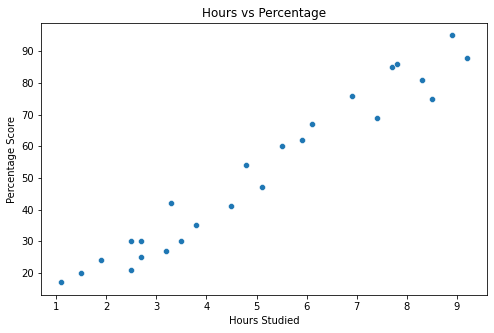

In [7]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=data['Hours'], y=data['Scores'])
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

**In the graph above, we see that there appears to be a positive linear relationship between hours studied and percentage score.**

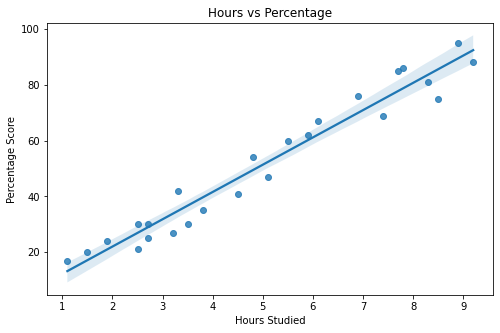

In [8]:
plt.figure(figsize=(8,5))
sns.regplot(x=data['Hours'], y=data['Scores'])   # regression plot gives a better and clear visualization of such data
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

### Preparing the data

In [9]:
X = data[['Hours']]
y = data['Scores']

### Train - Test split
##### using Scikit-Learn's built-in train_test_split() method, we'll split the data into training and test sets as follows:

In [10]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X,y,random_state=0)

### Model building

In [11]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(train_X, train_y)  # train the model

LinearRegression()

In [12]:
pred_y = regressor.predict(test_X) #prediction

In [13]:
pd.DataFrame({'Actual':test_y,'Predicted':pred_y}) # view actual and predicted on test set side by side

,Actual,Predicted
5,20,16.844722
2,27,33.745575
19,69,75.500624
16,30,26.786400
11,62,60.588106
22,35,39.710582
17,24,20.821393


In [14]:
print("Train Accuracy: ",regressor.score(train_X, train_y),"\nTest Accuracy: ",regressor.score(test_X, test_y))

Train Accuracy:  0.9484509249326872 
Test Accuracy:  0.9367661043365055


**What will be predicted score if a student studies for 9.25 hrs/day ?**

In [15]:
hours = [[9.25]]
s = regressor.predict(hours)
print("A student who studies ",hours[0][0]," hours is estimated to score ,",s[0])

A student who studies  9.25  hours is estimated to score , 93.89272889341655


**A student who studies  9.25  hours is estimated to score , 93.89272889341655**